# Social Network Analysis - Community Detection
This notebook delves deeper into several community detection approaches, which can be applied on social network data consisting of vertices and edges.


# Approach
1. Load the data
   1. Imports
   2. Loading the network
2. Community Detection with NetworkX
   1. Louvain Algorithm
   2. Greedy Modularity Algorithm
3. Community Detection with KMeans and DBScan
   1. Vectorization with Node2Vec
   2. Dimensionality Reduction
   3. KMeans
   4. DBScan
4. Evaluation
5. Visualization
   1. Louvain
   2. Greedy Modularity
   3. KMeans
   4. DBScan

# 1. Load the Data

##  1.1 Imports

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import umap

from networkx.algorithms.community import (
    louvain_communities,
    greedy_modularity_communities,
    modularity,
)
from node2vec import (
    Node2Vec,
)
from gensim.models import (
    Word2Vec,
)
from igraph import (
    Graph,
    plot,
)
from sklearn.manifold import (
    TSNE,
)
import matplotlib.pyplot as plt
from sklearn.neighbors import (
    NearestNeighbors,
)
from sklearn.cluster import (
    DBSCAN,
)
from sklearn.metrics import (
    silhouette_score,
)
from sklearn.cluster import (
    KMeans,
)

/Users/marcsutjipto/Library/Caches/pypoetry/virtualenvs/social-network-analysis-da1-l7-7zz-t-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1.2 Loading the Network

In [2]:
# Load the CSV-Files and store it as pandas dataframe
df_network = pd.read_csv(
    "../data/graph.csv",
    delimiter=",",
)
df_network.head()

,source,target,weight
0,1084949174,1050463558,1
1,1084949174,1002148361,1
2,1084949174,1000741574,1
3,1084949174,1019020642,1
4,1084949174,1044910984,1


In [3]:
# Convert the df_network dataframe into a networkx graph object
x_network = nx.from_pandas_edgelist(
    df_network,
    "source",
    "target",
)
print(x_network)

Graph with 46849 nodes and 94884 edges


In [4]:
# Convert network into an igraph object
# NOTE: IGraph will be mainly used to conduct tasks with a high computational complexity,
# since this library is implemented in C
igraph_graph = Graph.from_networkx(
    x_network
)
print(
    igraph_graph.summary()
)

IGRAPH U--- 46849 94884 -- 
+ attr: _nx_name (v)


In [ ]:
# Plot the graph for a first visual impression

# Let IGraph determine the best fitting layout
layout = igraph_graph.layout(
    "auto"
)

plot(
    igraph_graph,
    layout=layout,
    vertex_size=5,
    edge_width=0.1,
    vertex_label_dist=0.5,
    bbox=(500, 500),
)

**Visual Impression**: Above it is already visible that many nodes are overlapping, which looks like there are many small communities of nodes.
Furthermore, it looks like there is a bigger community in the center of the network.

# 2. Community Detection with NetworkX
The NetworkX library offers several approaches to detect communities in a social network. <br>
In this section we will examine the Louvain Algorithm as well as the Greedy Modularity Algorithm. <br>
<br>
Both approaches fit very good to our use case, because they are optimized to be applied to very large networks.
Hence, both approaches run very fast.

The Louvain Algorithm is based on the paper from: <br>
[1] Blondel, V.D. et al. Fast unfolding of communities in
    large networks. J. Stat. Mech 10008, 1-12(2008).
<br>

The Greedy Modularity Algorithm is based on the paper from: <br>
[2] Clauset, A., Newman, M. E., & Moore, C.
    "Finding community structure in very large networks."
    Physical Review E 70(6), 2004.



## 2.1 Louvain Algorithm


In [18]:
# Assign each user to a community with the louvain_communities function
communities_louvain = louvain_communities(
    x_network
)

# Print the number of communities for the louvain algorithm
print(
    len(
        communities_louvain
    )
)

251


## 2.2 Greedy Modularity Algorithm

In [5]:
# Assign each user to a community with the louvain_communities function
communities_greedy = greedy_modularity_communities(
    x_network
)

# Print the number of communities for the louvain algorithm
print(
    len(
        communities_greedy
    )
)

307


# 3. Community Detection with KMeans and DBScan
This section examines two clustering methods introduced in class.
Both methods use a numerical vector as input parameter. Consequently, it is necessary
to convert the graph representation of the network into a numerical representation.
A popular method to convert a graph into a numerical vector is the Node2Vec Algorithm.

## 3.1 Vectorization with Node2Vec

In [ ]:
# Create Node2Vec Object
# Adapt the number of workers = 1, if you use Windows!
node2vec = Node2Vec(
    x_network,
    dimensions=128,
    num_walks=100,
    workers=4,
)

In [5]:
# Create embeddings for the network nodes
# model = node2vec.fit()

# Alternative: Load stored model from models directory
model = Word2Vec.load(
    "../models/network_node2vec_2.model"
)

In [6]:
# Store embeddings and user_ids
node_ids = list(
    model.wv.index_to_key
)
embeddings = np.array(
    [
        model.wv[
            node
        ]
        for node in node_ids
    ]
)

## 3.2 Dimensionality Reduction
In order to reduce the computational complexity the dimensions of the embeddings will be reduced with a dimensionality reduction approach.
For visualization purposes the t-SNE Algorithm will be used. To keep as much features as possible from the embeddings the UMAP approach will be used.

In [7]:
# Reduce to two components
tsne = TSNE(
    n_components=2,
    random_state=42,
)
embeddings_2d = tsne.fit_transform(
    embeddings
)

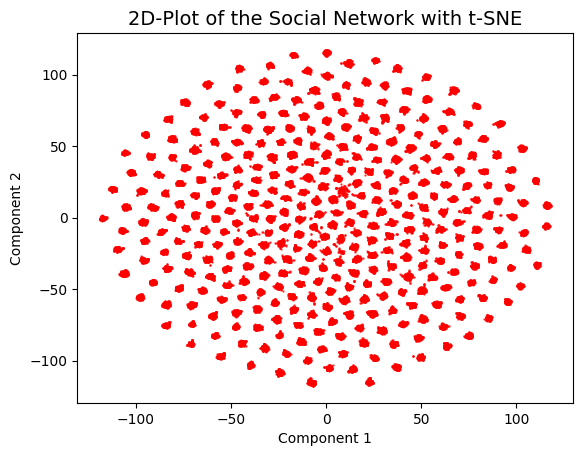

In [31]:
# Plot the Netork in a 2D-representation
plt.scatter(
    embeddings_2d[
        :, 0
    ],
    embeddings_2d[
        :, 1
    ],
    s=0.5,
    alpha=0.7,
    c="red",
)

plt.title(
    "2D-Plot of the Social Network with t-SNE",
    fontsize=14,
)
plt.xlabel(
    "Component 1"
)
plt.ylabel(
    "Component 2"
)
plt.show()

In [10]:
# Dimensionality Reduction with UMAP to 10 Dimensions
umap_reducer = umap.UMAP(
    n_components=10,
    transform_seed=42,
    metric="cosine",
)
umap_embeddings_10d = umap_reducer.fit_transform(
    embeddings
)

/Users/marcsutjipto/Library/Caches/pypoetry/virtualenvs/social-network-analysis-da1-l7-7zz-t-py3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## 3.3 KMeans

In [38]:
from tqdm import (
    tqdm,
)

# Use the Elbow Method to detect a valley in decrease of the WCSS
# We start from k=100, since we know from the Louvain- and Greedy Modularity Method that there a many communties
wcss = []  # Within-Cluster Sum of Squares
k_values = range(
    100, 370
)

for k in tqdm(
    k_values,
    desc="Calculate WCSS for k-values",
):
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
    )
    kmeans.fit(
        embeddings
    )
    wcss.append(
        kmeans.inertia_
    )

Calculate WCSS for k-values: 100%|██████████| 270/270 [11:27<00:00,  2.55s/it]


In [44]:
# plt.figure(figsize=(10, 10))
# plt.plot(k_values, wcss, marker='o', linestyle='-')
# plt.xlabel("Anzahl der Cluster (k)")
# plt.ylabel("Trägheit (WCSS)")
# plt.title("Elbow-Methode zur Bestimmung von k")
# plt.show()

## No Elbow to see

In [14]:
k_means = KMeans(
    n_clusters=300,
    random_state=42,
)
kmeans_labels = k_means.fit_predict(
    umap_embeddings_10d
)

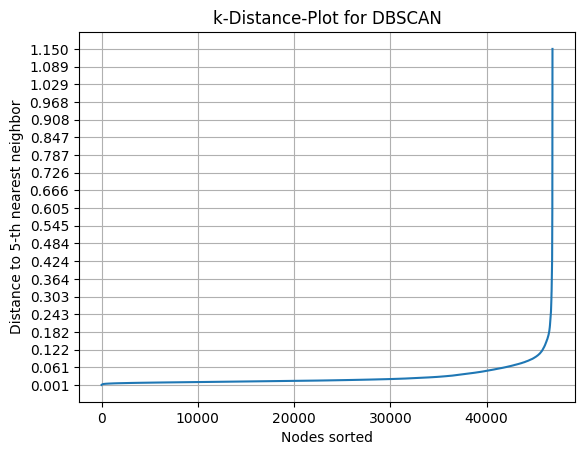

In [45]:
min_samples = 5

nearest_neighbors = NearestNeighbors(
    n_neighbors=min_samples
)
nearest_neighbors.fit(
    umap_embeddings_10d
)
(
    distances,
    indices,
) = nearest_neighbors.kneighbors(
    umap_embeddings_10d
)

distances = np.sort(
    distances[:, -1]
)
plt.plot(distances)
plt.xlabel(
    "Nodes sorted"
)
plt.ylabel(
    f"Distance to {min_samples}-th nearest neighbor"
)
plt.yticks(
    np.linspace(
        min(
            distances
        ),
        max(
            distances
        ),
        20,
    )
)
plt.title(
    "k-Distance-Plot for DBSCAN"
)
plt.grid(True)

In [11]:
dbscan = DBSCAN(
    eps=0.122,
    min_samples=5,
).fit(
    umap_embeddings_10d
)

# 4. Evaluation
In this section we will evaluate the cluster quality based on the silhouette_score and on the modularity
(only for Louvain and Greedy Modularity).

## 4.1 Silhouette Score

In [49]:
silhouette_kmeans = silhouette_score(
    umap_embeddings_10d,
    kmeans_labels,
)
print(
    silhouette_kmeans
)

0.9143905


In [57]:
silhouette_dbscan = silhouette_score(
    umap_embeddings_10d,
    dbscan.labels_,
)
print(
    silhouette_dbscan
)

0.9348546


# 4.2 Modularity

In [62]:
modularity_louvain = modularity(
    x_network,
    communities_louvain,
)
print(
    f"Communites detected by the Louvain Algorithm"
    f" has the following modularity: {modularity_louvain}"
)

Communites detected by the Louvain Algorithm has the following modularity: 0.9662857758624497


In [63]:
modularity_greedy_mod = modularity(
    x_network,
    communities_greedy,
)
print(
    f"Communites detected by the Greedy Algorithm "
    f"has the following modularity: {modularity_greedy_mod}"
)

Communites detected by the Greedy Algorithm has the following modularity: 0.9683642772144145


# 5. Visualization

In [19]:
# Assign cluster_ids to every node for the louvain algorithm
cluster_id_list_louv = []
cluster_node_id_list_louv = []
for (
    cluster_id,
    community,
) in enumerate(
    communities_louvain
):
    for (
        node
    ) in community:
        cluster_node_id_list_louv.append(
            node
        )
        cluster_id_list_louv.append(
            cluster_id
        )

In [17]:
# Assign cluster_ids to every node for the greedy modularity algorithm
cluster_id_list_gred = []
cluster_node_id_list_gred = []
for (
    cluster_id,
    community,
) in enumerate(
    communities_greedy
):
    for (
        node
    ) in community:
        cluster_node_id_list_gred.append(
            node
        )
        cluster_id_list_gred.append(
            cluster_id
        )

In [ ]:
colors_louv = [
    plt.cm.tab10(
        i % 10
    )
    for i in cluster_id_list_louv
]  # Matplotlib-Farben

# Weise jedem Knoten seine Cluster-Farbe zu
igraph_graph.vs[
    "color_louv"
] = colors_louv

layout = igraph_graph.layout(
    "auto"
)


plot(
    igraph_graph,
    layout=layout,
    vertex_size=5,
    vertex_color=igraph_graph.vs[
        "color_louv"
    ],
    edge_width=0.1,
    bbox=(
        1000,
        1000,
    ),
    target="../docs/louvain_visualization.png",
)

In [ ]:
colors_gred = [
    plt.cm.tab10(
        i % 10
    )
    for i in cluster_id_list_gred
]

# Weise jedem Knoten seine Cluster-Farbe zu
igraph_graph.vs[
    "color_gred"
] = colors_gred

layout = igraph_graph.layout(
    "auto"
)


plot(
    igraph_graph,
    layout=layout,
    vertex_size=5,
    vertex_color=igraph_graph.vs[
        "color_gred"
    ],
    edge_width=0.1,
    bbox=(
        1000,
        1000,
    ),
    target="../docs/greedy_mod_visualization.png",
)

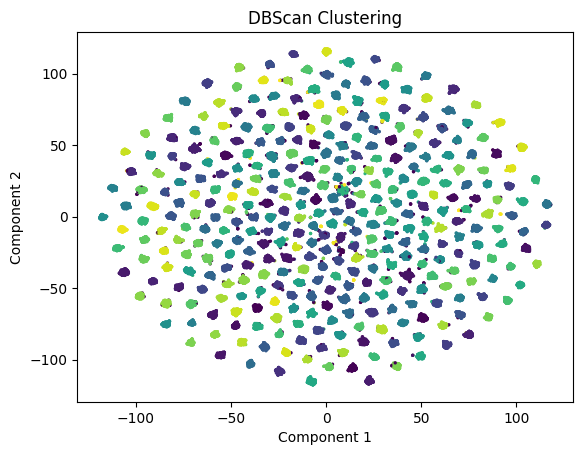

In [15]:
plt.scatter(
    embeddings_2d[
        :, 0
    ],
    embeddings_2d[
        :, 1
    ],
    c=dbscan.labels_,
    cmap="viridis",
    s=2,
)

plt.title(
    "DBScan Clustering"
)
plt.xlabel(
    "Component 1"
)
plt.ylabel(
    "Component 2"
)
# plt.savefig("../docs/dbscan_plot.png")
plt.show()